## 04 Linear Regression - Capital Bike Share

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###  1. Overview

#### About the data

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as

$$ \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i+1)−log(a_i+1))^2} $$

#### Submission Format

Your submission file must have a header and should be structured in the following format:

```
datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
```

#### Data Fields

| Column     | Meaning |
|:-----------|:----------|
| datetime   | hourly date + timestamp |
| season     | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| holiday    | whether the day is considered a holiday |
| workingday | whether the day is neither a weekend nor holiday |
| weather    | 1: Clear, Few clouds, Partly cloudy |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp       | temperature in Celsius |
| atemp      | "feels like" temperature in Celsius |
| humidity   | relative humidity |
| windspeed  | wind speed |
| casual     | number of non-registered user rentals initiated |
| registered | number of registered user rentals initiated |
| count      | number of total rentals |

#### Read In The Dataset

In [2]:
df = pd.read_csv('_RES/train.csv')

###  2. Train/Test Split

In [3]:
X = df

In [4]:
y = df[['count']]
# y = df[['datetime', 'count']].set_index('datetime')

In [5]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
y.head()

,count
0,16
1,40
2,32
3,13
4,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7293, 12), (3593, 12), (7293, 1), (3593, 1))

### 3. Exploratory Data Analysis

#### Size of the Dataset

In [9]:
X_train.shape, X_test.shape

((7293, 12), (3593, 12))

#### Print a few Rows of the Dataset

In [10]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5263,2011-12-13 09:00:00,4,0,1,1,10.66,12.880,60,11.0014,10,223,233
5261,2011-12-13 07:00:00,4,0,1,1,6.56,8.335,80,11.0014,2,221,223
1442,2011-04-05 23:00:00,2,0,1,1,12.30,14.395,49,19.0012,3,23,26
3690,2011-09-04 16:00:00,3,0,0,1,32.80,38.635,59,15.0013,196,141,337
1194,2011-03-14 12:00:00,1,0,1,1,15.58,19.695,37,0.0000,40,54,94


In [11]:
X_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5029,2011-12-03 15:00:00,4,0,0,1,15.58,19.695,46,0.0000,100,237,337
2883,2011-07-09 01:00:00,3,0,0,2,26.24,28.790,89,7.0015,5,48,53
522,2011-02-04 22:00:00,1,0,1,2,9.84,12.120,65,11.0014,1,45,46
2992,2011-07-13 14:00:00,3,0,1,3,33.62,37.880,46,8.9981,27,89,116
7230,2012-04-19 15:00:00,2,0,1,1,24.60,31.060,43,0.0000,66,196,262


#### Infos about dataset

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 5263 to 8787
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    7293 non-null   object 
 1   season      7293 non-null   int64  
 2   holiday     7293 non-null   int64  
 3   workingday  7293 non-null   int64  
 4   weather     7293 non-null   int64  
 5   temp        7293 non-null   float64
 6   atemp       7293 non-null   float64
 7   humidity    7293 non-null   int64  
 8   windspeed   7293 non-null   float64
 9   casual      7293 non-null   int64  
 10  registered  7293 non-null   int64  
 11  count       7293 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 740.7+ KB


#### Descriptive Statistics

In [13]:
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,2.511038,0.026875,0.684355,1.417798,20.306722,23.742171,61.758536,12.838203,35.938983,155.412039,191.351022
std,1.115416,0.161729,0.464804,0.631715,7.762482,8.443325,19.312675,8.137154,49.365699,150.565402,180.287957
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,43.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,12.998000,17.000000,119.000000,147.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,221.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,44.695000,100.000000,56.996900,367.000000,857.000000,970.000000


#### Add new columns for dates

In [14]:
ts_train = pd.to_datetime(X_train['datetime'])
ts_test = pd.to_datetime(X_test['datetime'])

In [15]:
ts_train, ts_test

(5263    2011-12-13 09:00:00
 5261    2011-12-13 07:00:00
 1442    2011-04-05 23:00:00
 3690    2011-09-04 16:00:00
 1194    2011-03-14 12:00:00
                 ...        
 6175    2012-02-13 13:00:00
 9704    2012-10-08 17:00:00
 10185   2012-11-09 19:00:00
 9256    2012-09-09 01:00:00
 8787    2012-08-08 12:00:00
 Name: datetime, Length: 7293, dtype: datetime64[ns],
 5029   2011-12-03 15:00:00
 2883   2011-07-09 01:00:00
 522    2011-02-04 22:00:00
 2992   2011-07-13 14:00:00
 7230   2012-04-19 15:00:00
                ...        
 6843   2012-04-03 11:00:00
 7496   2012-05-11 17:00:00
 3053   2011-07-16 03:00:00
 732    2011-02-13 21:00:00
 8757   2012-08-07 06:00:00
 Name: datetime, Length: 3593, dtype: datetime64[ns])

In [16]:
ts_train.dt.date, ts_test.dt.date

(5263     2011-12-13
 5261     2011-12-13
 1442     2011-04-05
 3690     2011-09-04
 1194     2011-03-14
             ...    
 6175     2012-02-13
 9704     2012-10-08
 10185    2012-11-09
 9256     2012-09-09
 8787     2012-08-08
 Name: datetime, Length: 7293, dtype: object,
 5029    2011-12-03
 2883    2011-07-09
 522     2011-02-04
 2992    2011-07-13
 7230    2012-04-19
            ...    
 6843    2012-04-03
 7496    2012-05-11
 3053    2011-07-16
 732     2011-02-13
 8757    2012-08-07
 Name: datetime, Length: 3593, dtype: object)

In [17]:
X_train.loc[:,'date'] = ts_train.dt.date
X_test.loc[:,'date'] = ts_test.dt.date

/home/snay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/snay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
X_train.loc[:,'year'] = ts_train.dt.year
X_test.loc[:,'year'] = ts_test.dt.year

In [19]:
X_train.loc[:,'month'] = ts_train.dt.month
X_test.loc[:,'month'] = ts_test.dt.month

In [20]:
X_train.loc[:,'day'] = ts_train.dt.day
X_test.loc[:,'day'] = ts_test.dt.day

In [21]:
X_train.loc[:,'weekday'] = ts_train.dt.weekday
X_test.loc[:,'weekday'] = ts_test.dt.weekday

In [22]:
X_train.loc[:,'hour'] = ts_train.dt.hour
X_test.loc[:,'hour'] = ts_test.dt.hour

In [23]:
X_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
5263,2011-12-13 09:00:00,4,0,1,1,10.66,12.880,60,11.0014,10,223,233,2011-12-13,2011,12,13,1,9
5261,2011-12-13 07:00:00,4,0,1,1,6.56,8.335,80,11.0014,2,221,223,2011-12-13,2011,12,13,1,7
1442,2011-04-05 23:00:00,2,0,1,1,12.30,14.395,49,19.0012,3,23,26,2011-04-05,2011,4,5,1,23
3690,2011-09-04 16:00:00,3,0,0,1,32.80,38.635,59,15.0013,196,141,337,2011-09-04,2011,9,4,6,16
1194,2011-03-14 12:00:00,1,0,1,1,15.58,19.695,37,0.0000,40,54,94,2011-03-14,2011,3,14,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,2012-02-13 13:00:00,1,0,1,1,13.12,15.150,22,15.0013,11,129,140,2012-02-13,2012,2,13,0,13
9704,2012-10-08 17:00:00,4,1,0,2,17.22,21.210,66,16.9979,81,416,497,2012-10-08,2012,10,8,0,17
10185,2012-11-09 19:00:00,4,0,1,1,13.94,17.425,71,6.0032,30,331,361,2012-11-09,2012,11,9,4,19
9256,2012-09-09 01:00:00,3,0,0,1,22.96,26.515,73,15.0013,20,104,124,2012-09-09,2012,9,9,6,1


In [24]:
X_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,weekday,hour
5029,2011-12-03 15:00:00,4,0,0,1,15.58,19.695,46,0.0000,100,237,337,2011-12-03,2011,12,3,5,15
2883,2011-07-09 01:00:00,3,0,0,2,26.24,28.790,89,7.0015,5,48,53,2011-07-09,2011,7,9,5,1
522,2011-02-04 22:00:00,1,0,1,2,9.84,12.120,65,11.0014,1,45,46,2011-02-04,2011,2,4,4,22
2992,2011-07-13 14:00:00,3,0,1,3,33.62,37.880,46,8.9981,27,89,116,2011-07-13,2011,7,13,2,14
7230,2012-04-19 15:00:00,2,0,1,1,24.60,31.060,43,0.0000,66,196,262,2012-04-19,2012,4,19,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,2012-04-03 11:00:00,2,0,1,1,19.68,23.485,23,0.0000,91,167,258,2012-04-03,2012,4,3,1,11
7496,2012-05-11 17:00:00,2,0,1,1,26.24,30.305,23,16.9979,102,677,779,2012-05-11,2012,5,11,4,17
3053,2011-07-16 03:00:00,3,0,0,1,24.60,28.790,78,8.9981,6,20,26,2011-07-16,2011,7,16,5,3
732,2011-02-13 21:00:00,1,0,0,1,16.40,20.455,35,23.9994,6,45,51,2011-02-13,2011,2,13,6,21


#### Check for missing values

In [25]:
X_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
year          0
month         0
day           0
weekday       0
hour          0
dtype: int64

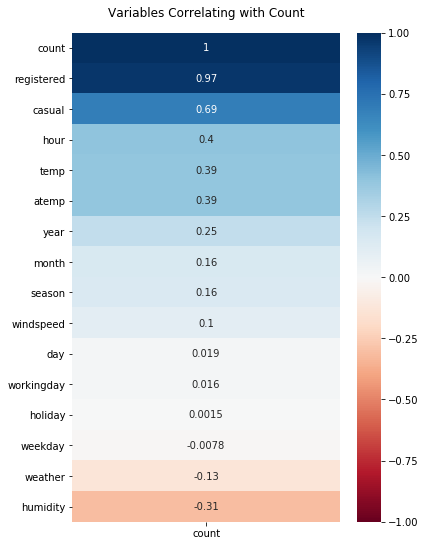

In [26]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(X_train.corr()[['count']].sort_values(by='count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')

heatmap.set_title('Variables Correlating with Count', fontdict={'fontsize':12}, pad=16);

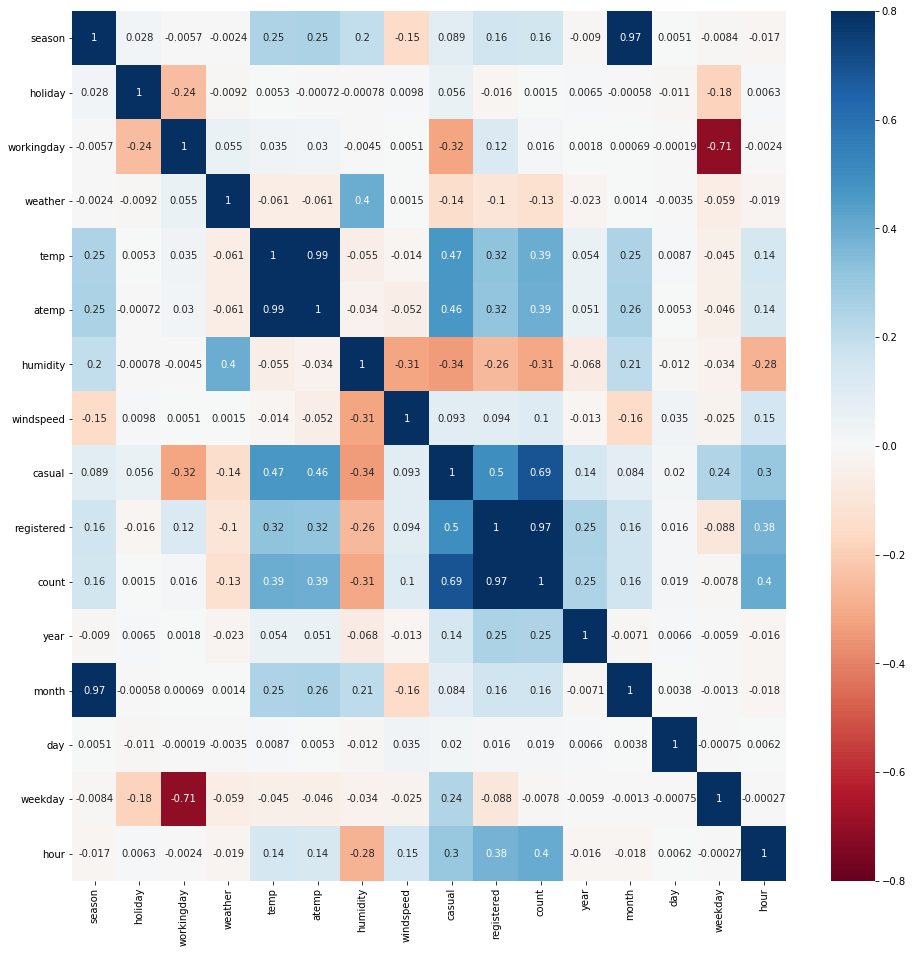

In [27]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(X_train.corr(), vmin=-.8, vmax=.8, annot=True, cmap='RdBu')

#### 'Season' Insights

In [28]:
X_train.groupby(['season'])['count'].mean()

season
1    116.630666
2    218.231694
3    231.221436
4    197.363983
Name: count, dtype: float64

Text(0.5, 1.0, 'Box Plot on Count across Season')

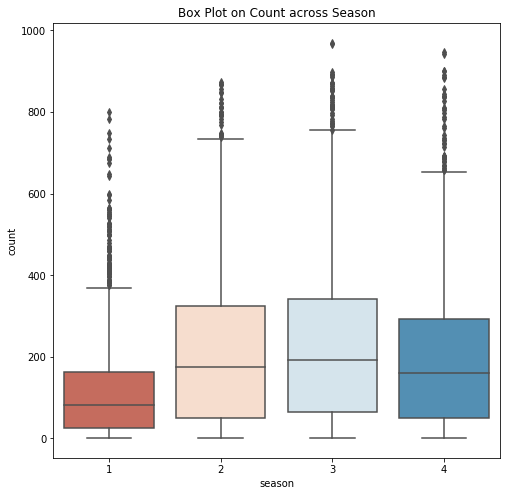

In [29]:
plt.figure(figsize = (8,8))
sns.boxplot(data = X_train, x = "season", y = "count", palette='RdBu').set_title('Box Plot on Count across Season')

#### 'Date' Insights

Text(0.5, 1.0, 'Count by Month')

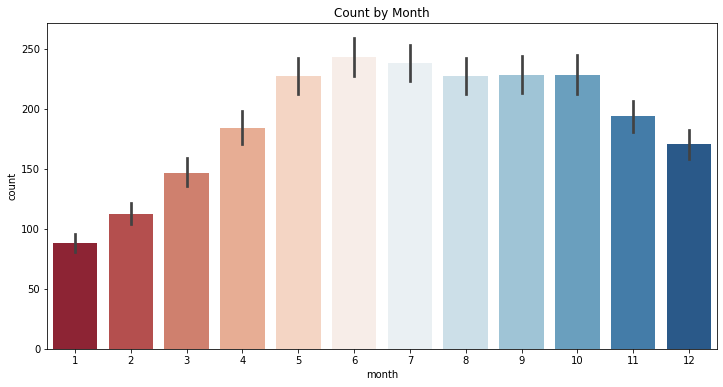

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=X_train, x="month", y="count", palette='RdBu').set_title("Count by Month")

In [31]:
X_train['day'].unique()

array([13,  5,  4, 14,  6, 17,  1, 19,  2, 15, 12,  9, 10, 11,  7, 18, 16,
        8,  3])

Text(0.5, 1.0, 'Count by Day')

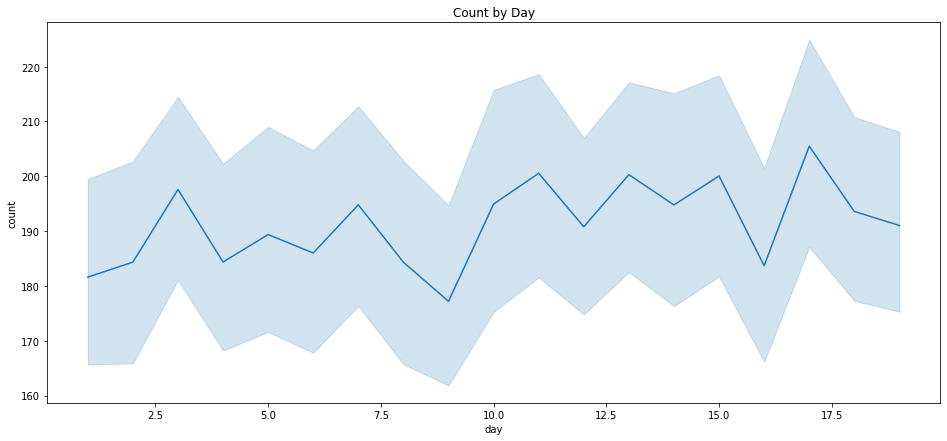

In [32]:
plt.figure(figsize=(16,7))

sns.lineplot(data=X_train, x='day', y='count', palette='RdBu').set_title("Count by Day")

Text(0.5, 1.0, 'Count by Weekday')

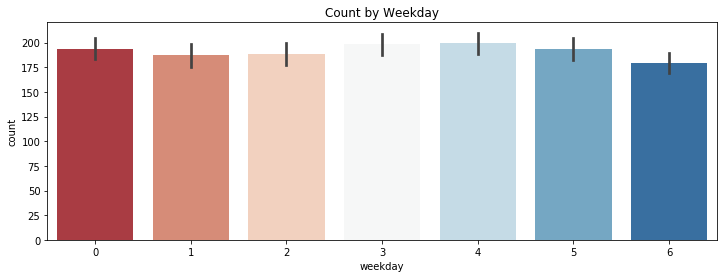

In [33]:
plt.figure(figsize=(12,4))

sns.barplot(data=X_train, x='weekday', y='count', palette='RdBu').set_title("Count by Weekday")

Text(0.5, 1.0, 'Count by hour on weekdays')

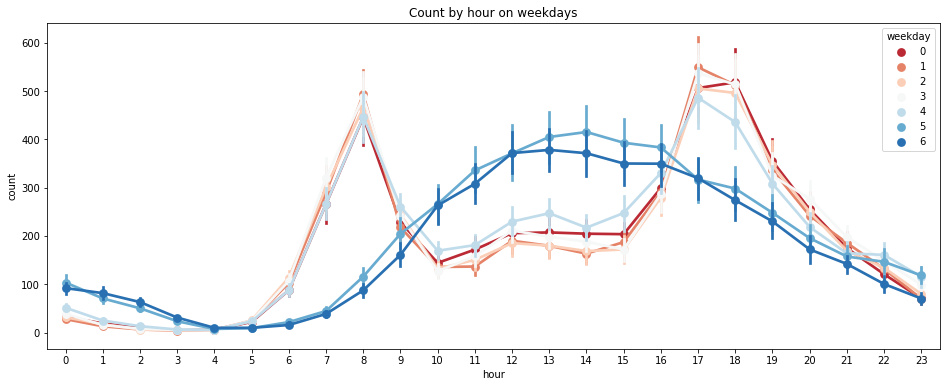

In [34]:
plt.figure(figsize=(16,6))

sns.pointplot(x = "hour", y = "count", data = X_train, hue = "weekday", palette = "RdBu", legend='full').set_title("Count by hour on weekdays")

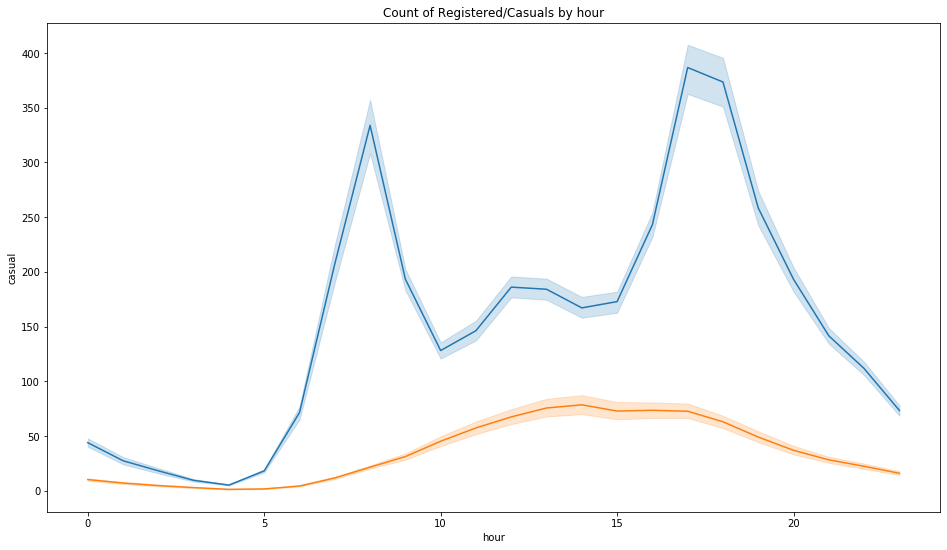

In [35]:
plt.figure(figsize=(16,9))

sns.lineplot(x = 'hour', y = 'registered', data = X_train, palette = "RdBu").set_title("Count of Registered/Casuals by hour")
sns.lineplot(x = 'hour', y = 'casual', data = X_train, palette = "RdBu")

In [36]:
# X_train.resample('M').sum()

In [37]:
plt.figure(figsize=(16,9))

# sns.lineplot(x = 'datetime', y = 'registered', data=X_train)

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

###  4. Feature Engineering

In [38]:
features = ['hour', 'temp']

In [39]:
X_train = X_train[features] 
X_test = X_test[features]

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7293, 2), (3593, 2), (7293, 1), (3593, 1))

###  5. Train A Model

#### Train baseline model

In [41]:
m_BL = DummyRegressor(strategy='mean')

In [42]:
m_BL.fit(X_train, y_train)

DummyRegressor()

#### Train Linear Regression Model

In [43]:
m_LinReg = LinearRegression()

In [44]:
m_LinReg.fit(X_train, y_train)

LinearRegression()

In [45]:
print("Linear Regression Coefficients:", m_LinReg.coef_)
print("Linear Regression Intercept   :", m_LinReg.intercept_)

Linear Regression Coefficients: [[9.19169819 8.01008908]]
Linear Regression Intercept   : [-77.80428288]


###  6. Cross-Validation

###  7. Optimize The Model Iteratively

Select features, try different regressors (e.g. Linear Regression, Random Forest Regressor, SVR)

###  8. Calculate Test Score

In [46]:
print("Baseline train score :", m_BL.score(X_train, y_train))
print("Baseline test score  :", m_BL.score(X_test, y_test))

Baseline train score : 0.0
Baseline test score  : -1.3664036797589318e-05


In [47]:
print("Linear Regression train score :", m_LinReg.score(X_train, y_train))
print("Linear Regression test score  :", m_LinReg.score(X_test, y_test))

Linear Regression train score : 0.2770525001983948
Linear Regression test score  : 0.27362551082833686


In [48]:
ypred_LinReg = m_LinReg.predict(X_test)

#### Model Performance for "Hour"

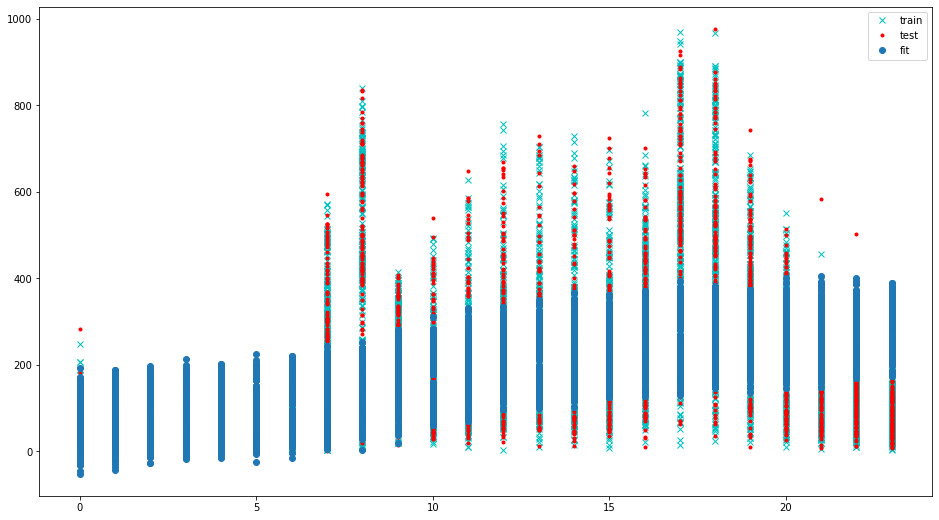

In [54]:
plt.figure(figsize=(16,9))
 
plt.plot(X_train['hour'], y_train, 'cx', label="train")
plt.plot(X_test['hour'], y_test, 'r.', label="test")
plt.plot(X_test['hour'], ypred_LinReg, 'o', label="fit")
plt.legend()

#### Model Performance for "Temperature"

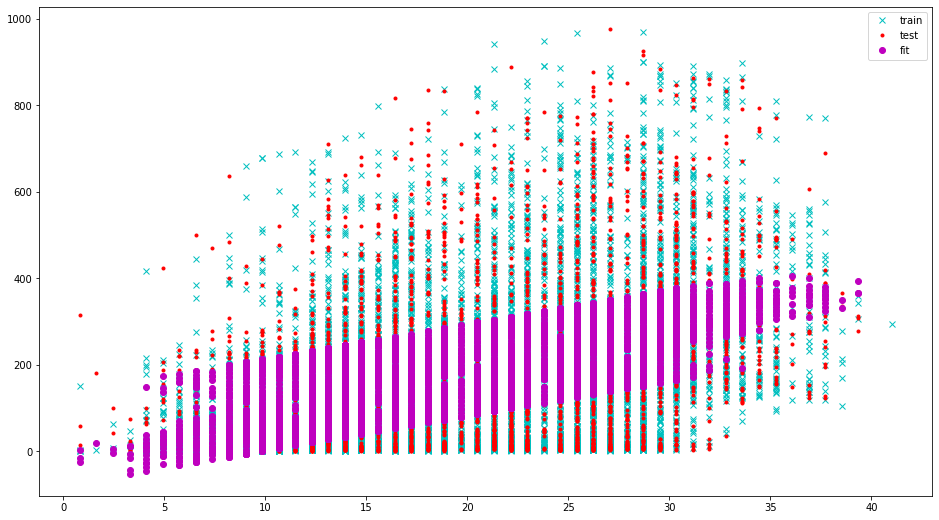

In [53]:
plt.figure(figsize=(16,9))
 
plt.plot(X_train['temp'], y_train, 'cx', label="train")
plt.plot(X_test['temp'], y_test, 'r.', label="test")
plt.plot(X_test['temp'], ypred_LinReg, 'mo', label="fit")
plt.legend()

###  9. Submit To Kaggle